<a href="https://colab.research.google.com/github/Harshita-Puthran/factverse/blob/main/factverse_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_parquet("hf://datasets/NickyNicky/global-news-dataset/data/train-00000-of-00001.parquet")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
print(df.head(100))

    article_id source_id                   source_name  \
0        89541      None  International Business Times   
1        89542      None                    Prtimes.jp   
2        89543      None                      VOA News   
3        89545      None            The Indian Express   
4        89547      None           The Times of Israel   
..         ...       ...                           ...   
95       89702      None                        Forbes   
96       89704      None                     Aajtak.in   
97       89707      None                     The Punch   
98       89710      None                 TheJournal.ie   
99       89714      None                           NPR   

                                               author  \
0                                      Paavan MATHEMA   
1                                                None   
2          webdesk@voanews.com (Agence France-Presse)   
3                                           Editorial   
4                 

In [ ]:
df.shape

(105375, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105375 entries, 0 to 105374
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   article_id    105375 non-null  int64 
 1   source_id     24495 non-null   object
 2   source_name   105375 non-null  object
 3   author        97156 non-null   object
 4   title         105335 non-null  object
 5   description   104992 non-null  object
 6   url           105375 non-null  object
 7   url_to_image  99751 non-null   object
 8   published_at  105375 non-null  object
 9   content       105375 non-null  object
 10  category      105333 non-null  object
 11  full_content  58432 non-null   object
dtypes: int64(1), object(11)
memory usage: 9.6+ MB


### **Cleaning and Preparing the data**

In [ ]:
df.isnull().sum()

,0
article_id,0
source_id,80880
source_name,0
author,8219
title,40
description,383
url,0
url_to_image,5624
published_at,0
content,0


In [ ]:
df['source_name'].value_counts().head(10)


,count
source_name,
ETF Daily News,16631
The Times of India,7629
GlobeNewswire,5485
Forbes,4423
Biztoc.com,3968
BBC News,3342
Globalsecurity.org,3093
Business Insider,2746
ABC News,2188


In [ ]:
#missing value imputation
df['author'].fillna('Unknown', inplace=True)
df['url_to_image'].fillna('NA', inplace=True)

df = df.drop(['source_id'],axis=1)
#drop all columns with missing title since it is important
df = df.dropna(subset=['title'])
# Fill missing description with empty string
df['description'] = df['description'].fillna('')
# Rename category to country
df = df.rename(columns={'category': 'country'})
df['country'] = df['country'].fillna('Unknown')

/tmp/ipython-input-1671358080.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['author'].fillna('Unknown', inplace=True)
/tmp/ipython-input-1671358080.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
df.head()

,article_id,source_name,author,title,description,url,url_to_image,published_at,content,country,full_content
0,89541,International Business Times,Paavan MATHEMA,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,https://d.ibtimes.com/en/full/4496078/nepals-g...,2023-10-30 10:12:35.000000,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...
1,89542,Prtimes.jp,Unknown,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,https://prtimes.jp/main/html/rd/p/000000147.00...,https://prtimes.jp/i/32220/147/ogp/d32220-147-...,2023-10-06 04:40:02.000000,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,None
2,89543,VOA News,webdesk@voanews.com (Agence France-Presse),UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,https://www.voanews.com/a/un-chief-urges-world...,https://gdb.voanews.com/01000000-0a00-0242-60f...,2023-10-30 10:53:30.000000,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,None
3,89545,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06 01:20:24.000000,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...
4,89547,The Times of Israel,Jacob Magid,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...",https://www.timesofisrael.com/200-foreigners-d...,https://static.timesofisrael.com/www/uploads/2...,2023-10-27 01:08:34.000000,"Scores of foreign citizens were killed, taken ...",Nepal,None


In [ ]:
df.isnull().sum()

,0
article_id,0
source_name,0
author,0
title,0
description,0
url,0
url_to_image,0
published_at,0
content,0
country,0


In [ ]:
df['country'].value_counts()

,count
country,
Stock,3999
Health,2594
Finance,2402
Technology,2371
Real estate,2352
...,...
Eritrea,14
Martinique,13
Cabo Verde,11


In [ ]:
df = df.rename(columns={'country': 'category'})

In [ ]:
pd.set_option("display.max_rows", None)

print(df['category'].value_counts())

category
Stock                                    3999
Health                                   2594
Finance                                  2402
Technology                               2371
Real estate                              2352
Canada                                   2324
News                                     1852
COVID                                    1821
Education                                1771
Food                                     1613
Jobs                                     1562
Weather                                  1495
Travel                                   1451
Cars                                     1289
Science                                  1260
Asia                                     1242
India                                    1196
Music                                    1159
Politics                                 1154
Climate                                  1140
America                                  1134
Fashion                  

In [ ]:
print(df['category'].value_counts().head(50))

category
Stock                      3999
Health                     2594
Finance                    2402
Technology                 2371
Real estate                2352
Canada                     2324
News                       1852
COVID                      1821
Education                  1771
Food                       1613
Jobs                       1562
Weather                    1495
Travel                     1451
Cars                       1289
Science                    1260
Asia                       1242
India                      1196
Music                      1159
Politics                   1154
Climate                    1140
America                    1134
Fashion                    1121
Sports                     1106
Artificial Intelligence    1102
Love                       1057
Relationships              1043
Home                       1006
Africa                      995
Australia                   992
Google                      979
Space                       974

In [ ]:
#text quality and length
df['title_len'] = df['title'].astype(str).str.len()
df['desc_len'] = df['description'].astype(str).str.len()
df['content_len'] = df['content'].astype(str).str.len()
df[['title_len','desc_len','content_len']].describe()

,title_len,desc_len,content_len
count,105335.000000,105335.000000,105335.000000
mean,72.660189,199.862486,208.981649
std,26.327278,69.241102,23.938623
min,4.000000,0.000000,25.000000
25%,56.000000,143.000000,213.000000
50%,70.000000,243.000000,214.000000
75%,85.000000,260.000000,214.000000
max,583.000000,260.000000,216.000000


In [ ]:
df.duplicated(subset=['title','source_name']).sum()

np.int64(5174)

In [ ]:
# Drop duplicates based on title + source_name
df = df.drop_duplicates(subset=['title', 'source_name'], keep='first').reset_index(drop=True)

# Check again to confirm
print(df.duplicated(subset=['title', 'source_name']).sum())  # should be 0
print(df.shape)


0
(100161, 14)


In [ ]:
# Drop rows where title has more than 150 words
df = df[df['title'].astype(str).apply(lambda x: len(x.split()) <= 150)].reset_index(drop=True)

# Verify
print(df['title'].apply(lambda x: len(str(x).split())).max())  # should be <= 100
print(df.shape)

94
(100161, 14)


In [ ]:
#now we have removed some outliers

In [ ]:
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download resources
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
nlp = spacy.load("en_core_web_sm")
def clean_text(text):
    if pd.isnull(text):
        return ""

    # Lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)

    # Remove HTML tags
    text = re.sub(r"<.*?>", "", text)

    # Remove special characters, digits
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Tokenize + remove stopwords + lemmatize
    tokens = []
    for word in nltk.word_tokenize(text):
        if word not in stop_words and len(word) > 2:  # remove stopwords + very short words
            tokens.append(lemmatizer.lemmatize(word))

    return " ".join(tokens)

df["title_clean"] = df["title"].astype(str).apply(clean_text)
df["content_clean"] = df["content"].astype(str).apply(clean_text)

print(df[["title", "title_clean"]].head((10)))

                                               title  \
0  UN Chief Urges World To 'Stop The Madness' Of ...   
1              RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。   
2  UN Chief Urges World to 'Stop the Madness' of ...   
3  Sikkim warning: Hydroelectricity push must be ...   
4  200 foreigners, dual nationals cut down in Ham...   
5                                 中印交惡令尼泊爾機場難以發展國際航線   
6  Pro-Israel rallies allowed in India but Palest...   
7  No nation in the world is buying more planes t...   
8  More than 130 people have reportedly been take...   
9  World Cup: New Zealand v Bangladesh - clips, r...   

                                         title_clean  
0       chief urge world stop madness climate change  
1                                           randeboo  
2       chief urge world stop madness climate change  
3  sikkim warning hydroelectricity push must acco...  
4     foreigner dual national cut hamas assault here  
5                                                    

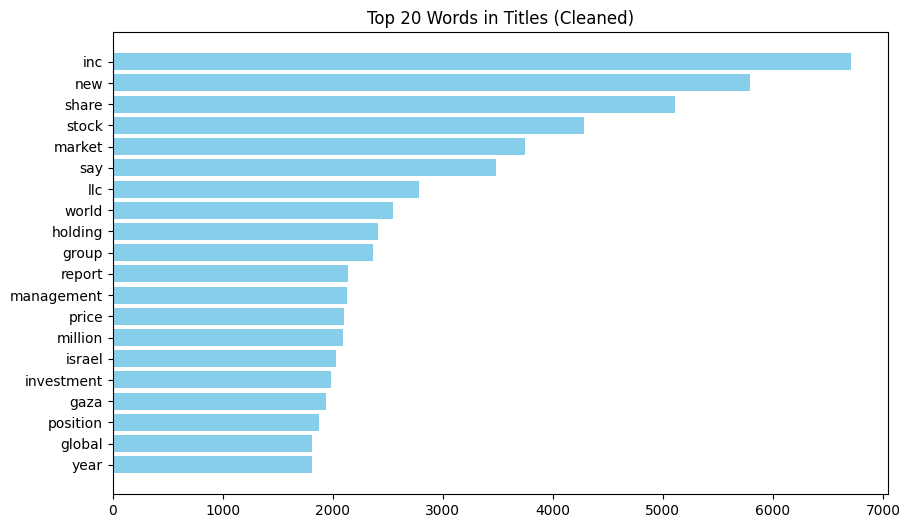

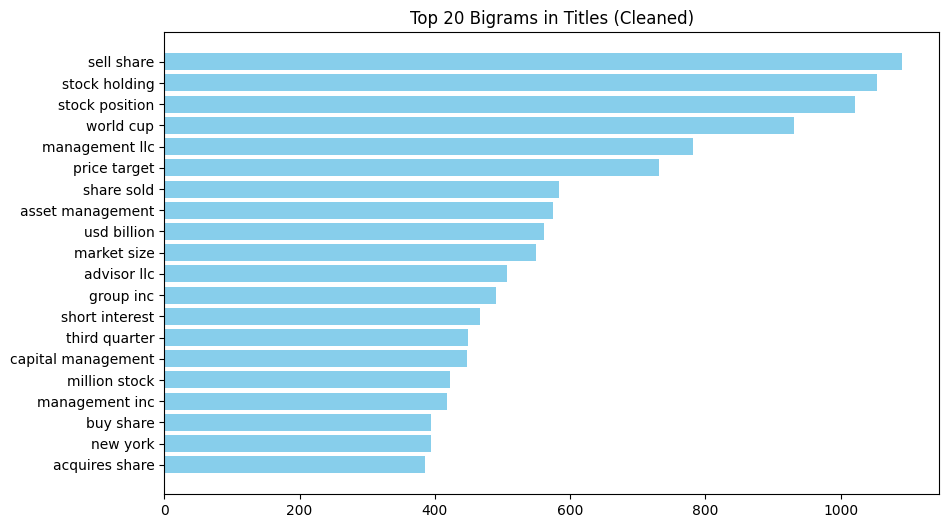

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
# Helper to plot top n-grams
def plot_top_ngrams(corpus, n=20, ngram_range=(1,1), title="Top N-grams"):
    vectorizer = CountVectorizer(ngram_range=ngram_range)  # no stopwords, already cleaned
    X = vectorizer.fit_transform(corpus.dropna())
    freqs = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])
    df_freq = pd.DataFrame(freqs, columns=["term","count"]).sort_values(by="count", ascending=False).head(n)

    plt.figure(figsize=(10,6))
    plt.barh(df_freq["term"], df_freq["count"], color="skyblue")
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.show()

#Top words in cleaned titles
plot_top_ngrams(df["title_clean"], n=20, ngram_range=(1,1), title="Top 20 Words in Titles (Cleaned)")

# Top bigrams in cleaned titles
plot_top_ngrams(df["title_clean"], n=20, ngram_range=(2,2), title="Top 20 Bigrams in Titles (Cleaned)")


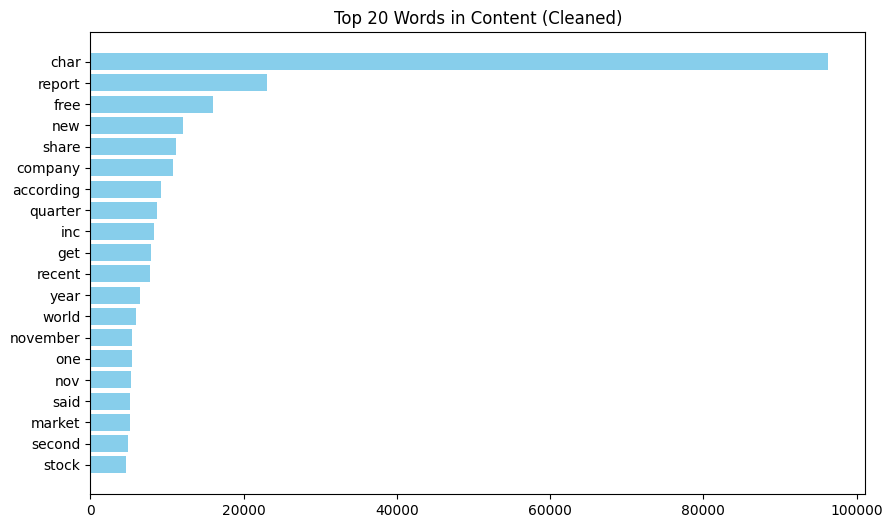

In [ ]:

#Top words in cleaned content
plot_top_ngrams(df["content_clean"], n=20, ngram_range=(1,1), title="Top 20 Words in Content (Cleaned)")

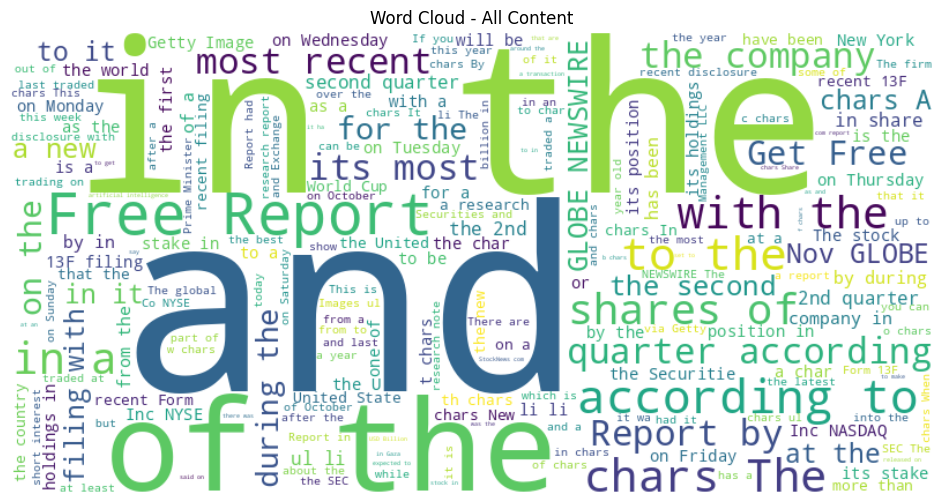

In [ ]:
#word cloud for all content
text = " ".join(df["content"].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords="english").generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - All Content")
plt.show()

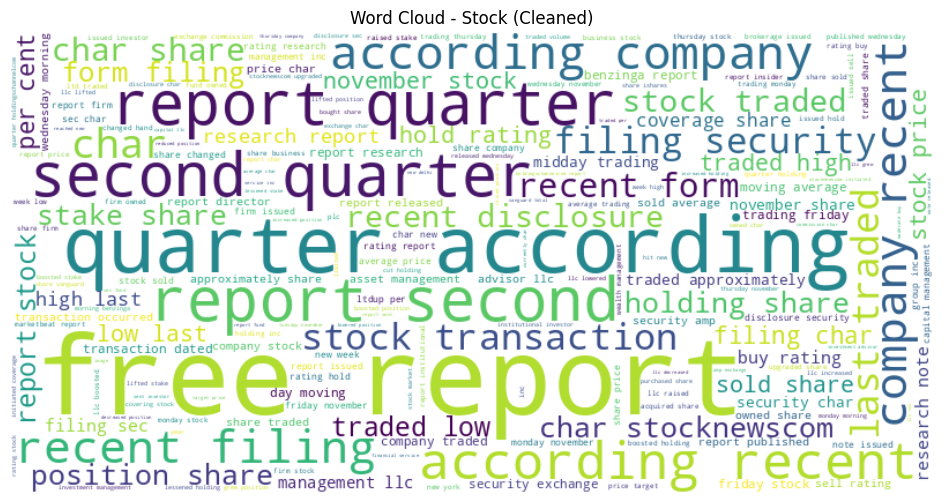

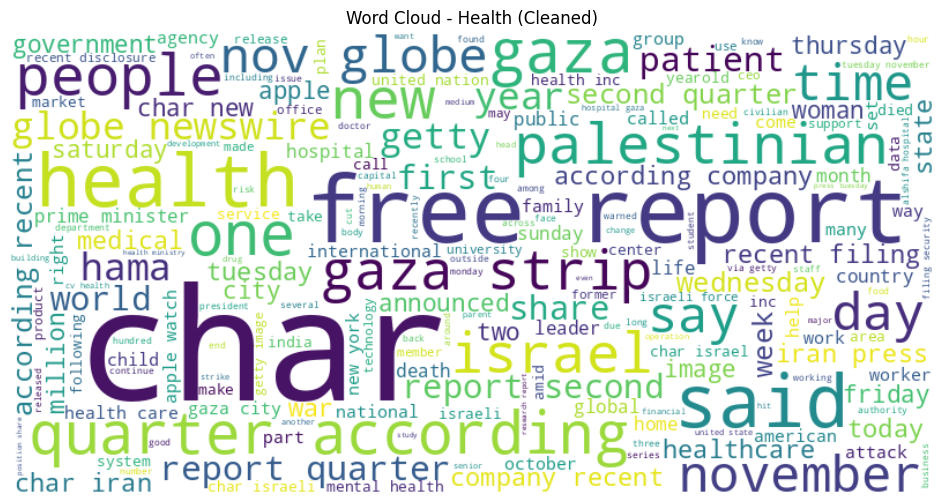

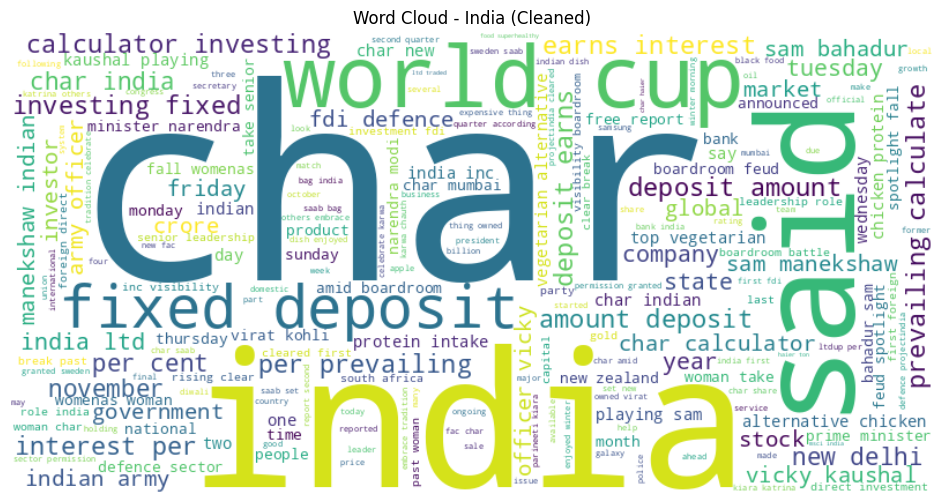

In [ ]:
# Word cloud by category (example: Stock, India, AI, Health)
category = "Stock"
text_cat = " ".join(df[df["category"]==category]["content_clean"].dropna().astype(str).tolist())
wordcloud_cat = WordCloud(width=800, height=400, background_color="white").generate(text_cat)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_cat, interpolation="bilinear")
plt.axis("off")
plt.title(f"Word Cloud - {category} (Cleaned)")
plt.show()

category = "Health"
text_cat = " ".join(df[df["category"]==category]["content_clean"].dropna().astype(str).tolist())
wordcloud_cat = WordCloud(width=800, height=400, background_color="white").generate(text_cat)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_cat, interpolation="bilinear")
plt.axis("off")
plt.title(f"Word Cloud - {category} (Cleaned)")
plt.show()

category = "India"
text_cat = " ".join(df[df["category"]==category]["content_clean"].dropna().astype(str).tolist())
wordcloud_cat = WordCloud(width=800, height=400, background_color="white").generate(text_cat)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_cat, interpolation="bilinear")
plt.axis("off")
plt.title(f"Word Cloud - {category} (Cleaned)")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder
import numpy as np

tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # top words
    ngram_range=(1,2),  # unigrams + bigrams
    stop_words='english'
)

X_tfidf = tfidf_vectorizer.fit_transform(df['title_clean'])

df['statement_word_count'] = df['title_clean'].apply(lambda x: len(x.split()))
df['body_word_count'] = df['content_clean'].apply(lambda x: len(x.split()))
df['statement_char_count'] = df['title_clean'].apply(len)

df['exclamation_count'] = df['title'].str.count('!')
df['question_count'] = df['title'].str.count('\?')
df['capital_ratio'] = df['title'].apply(lambda x: sum(1 for c in x if c.isupper()) / max(1,len(x)))

<>:19: SyntaxWarning: invalid escape sequence '\?'
<>:19: SyntaxWarning: invalid escape sequence '\?'
/tmp/ipython-input-2553646968.py:19: SyntaxWarning: invalid escape sequence '\?'
  df['question_count'] = df['title'].str.count('\?')


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
df['embedding'] = df['title_clean'].apply(lambda x: model.encode(x))

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
df.head(10)

,article_id,source_name,author,title,description,url,url_to_image,published_at,content,category,...,content_len,title_clean,content_clean,statement_word_count,body_word_count,statement_char_count,exclamation_count,question_count,capital_ratio,embedding
0,89541,International Business Times,Paavan MATHEMA,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,https://d.ibtimes.com/en/full/4496078/nepals-g...,2023-10-30 10:12:35.000000,UN Secretary-General Antonio Guterres urged th...,Nepal,...,214,chief urge world stop madness climate change,secretarygeneral antonio guterres urged world ...,7,20,44,0,0,0.200000,"[0.0031045575, 0.009605408, 0.105615094, 0.015..."
1,89542,Prtimes.jp,Unknown,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,https://prtimes.jp/main/html/rd/p/000000147.00...,https://prtimes.jp/i/32220/147/ogp/d32220-147-...,2023-10-06 04:40:02.000000,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,...,204,randeboo,randebooweb autumn winter nepal handmade ram v...,1,16,8,0,0,0.216216,"[-0.074106656, 0.019410077, -0.06308513, -0.06..."
2,89543,VOA News,webdesk@voanews.com (Agence France-Presse),UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,https://www.voanews.com/a/un-chief-urges-world...,https://gdb.voanews.com/01000000-0a00-0242-60f...,2023-10-30 10:53:30.000000,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,...,214,chief urge world stop madness climate change,kathmandu nepal secretarygeneral antonio guter...,7,21,44,0,0,0.150000,"[0.0031045575, 0.009605408, 0.105615094, 0.015..."
3,89545,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06 01:20:24.000000,At least 14 persons lost their lives and more ...,Nepal,...,214,sikkim warning hydroelectricity push must acco...,least person lost life others including army p...,8,20,68,0,0,0.026316,"[-0.019123243, 0.0733285, -0.0033720771, 0.029..."
4,89547,The Times of Israel,Jacob Magid,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...",https://www.timesofisrael.com/200-foreigners-d...,https://static.timesofisrael.com/www/uploads/2...,2023-10-27 01:08:34.000000,"Scores of foreign citizens were killed, taken ...",Nepal,...,213,foreigner dual national cut hamas assault here,score foreign citizen killed taken hostage lis...,7,19,46,0,0,0.023529,"[0.049873214, 0.06590945, 0.048656657, -0.0823..."
5,89550,BBC News,https://www.facebook.com/bbcworldservice/,中印交惡令尼泊爾機場難以發展國際航線,尼泊爾花費數百萬美元建造一座新機場，希望藉此推動旅遊業——但是機場建好了，卻沒有人來。,https://www.bbc.com/zhongwen/trad/world-67015581,https://ichef.bbci.co.uk/news/1024/branded_zho...,2023-10-05 07:30:45.000000,Getty Images\n20225\n·Bishnu Sharma\nLumbini\n...,Nepal,...,203,,getty image bishnu sharma lumbini lumbini deve...,0,19,0,0,0,0.000000,"[-0.11883843, 0.048298735, -0.0025481386, -0.0..."
6,89551,Al Jazeera English,Kaushik Raj,Pro-Israel rallies allowed in India but Palest...,"India, the first non-Arab country to recognise...",https://www.aljazeera.com/news/2023/10/25/pro-...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-25 09:58:17.000000,"New Delhi, India Israels relentless bombing of...",Nepal,...,214,proisrael rally allowed india palestine solida...,new delhi india israel relentless bombing besi...,8,23,64,0,0,0.053333,"[0.024733247, 0.015133075, -0.050651878, -0.09..."
7,89555,The Indian Express,New York Times,No nation in the world is buying more planes t...,India's largest airlines have ordered nearly 1...,https://indianexpress.com/article/business/avi...,https://images.indianexpress.com/2023/11/igiai...,2023-11-02 05:48:58.000000,No nation in the world is buying as many airpl...,Nepal,.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100161 entries, 0 to 100160
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   article_id            100161 non-null  int64  
 1   source_name           100161 non-null  object 
 2   author                100161 non-null  object 
 3   title                 100161 non-null  object 
 4   description           100161 non-null  object 
 5   url                   100161 non-null  object 
 6   url_to_image          100161 non-null  object 
 7   published_at          100161 non-null  object 
 8   content               100161 non-null  object 
 9   category              100161 non-null  object 
 10  full_content          53833 non-null   object 
 11  title_len             100161 non-null  int64  
 12  desc_len              100161 non-null  int64  
 13  content_len           100161 non-null  int64  
 14  title_clean           100161 non-null  object 
 15  

In [ ]:
# See before vs after cleaning
df[["title", "title_clean"]].sample(5)

,title,title_clean
43402,"Rudolph Isley, Co-Founder of the Isley Brother...",rudolph isley cofounder isley brother dy
46046,Amini wins Sakharov Prize: Will it help Irania...,amini win sakharov prize help iranian woman
93680,Climate change: Rise in Google searches around...,climate change rise google search around anxiety
44978,U.S. Airports: Best Security or Best at Sellin...,airport best security best selling expedited s...
11006,Lufthansa’s Earnings Beat Forecasts After Stro...,lufthansas earnings beat forecast strong summer


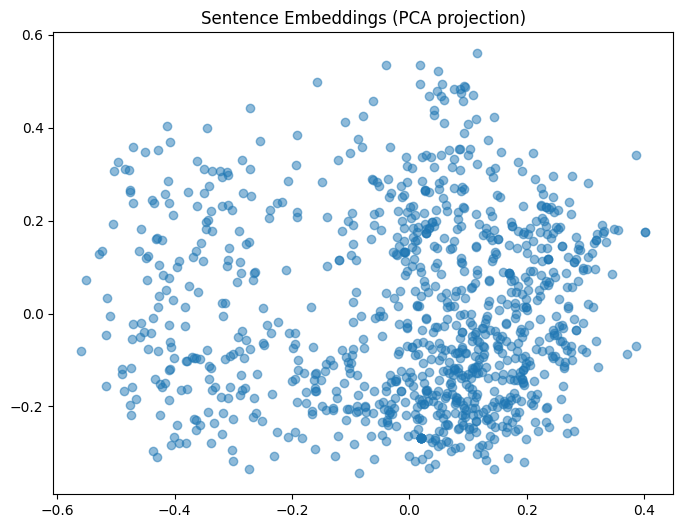

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convert list of embeddings into matrix
emb_matrix = np.vstack(df["embedding"].values[:1000])  # sample for speed

# Reduce dimensions
pca = PCA(n_components=2)
reduced = pca.fit_transform(emb_matrix)

plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], alpha=0.5)
plt.title("Sentence Embeddings (PCA projection)")
plt.show()

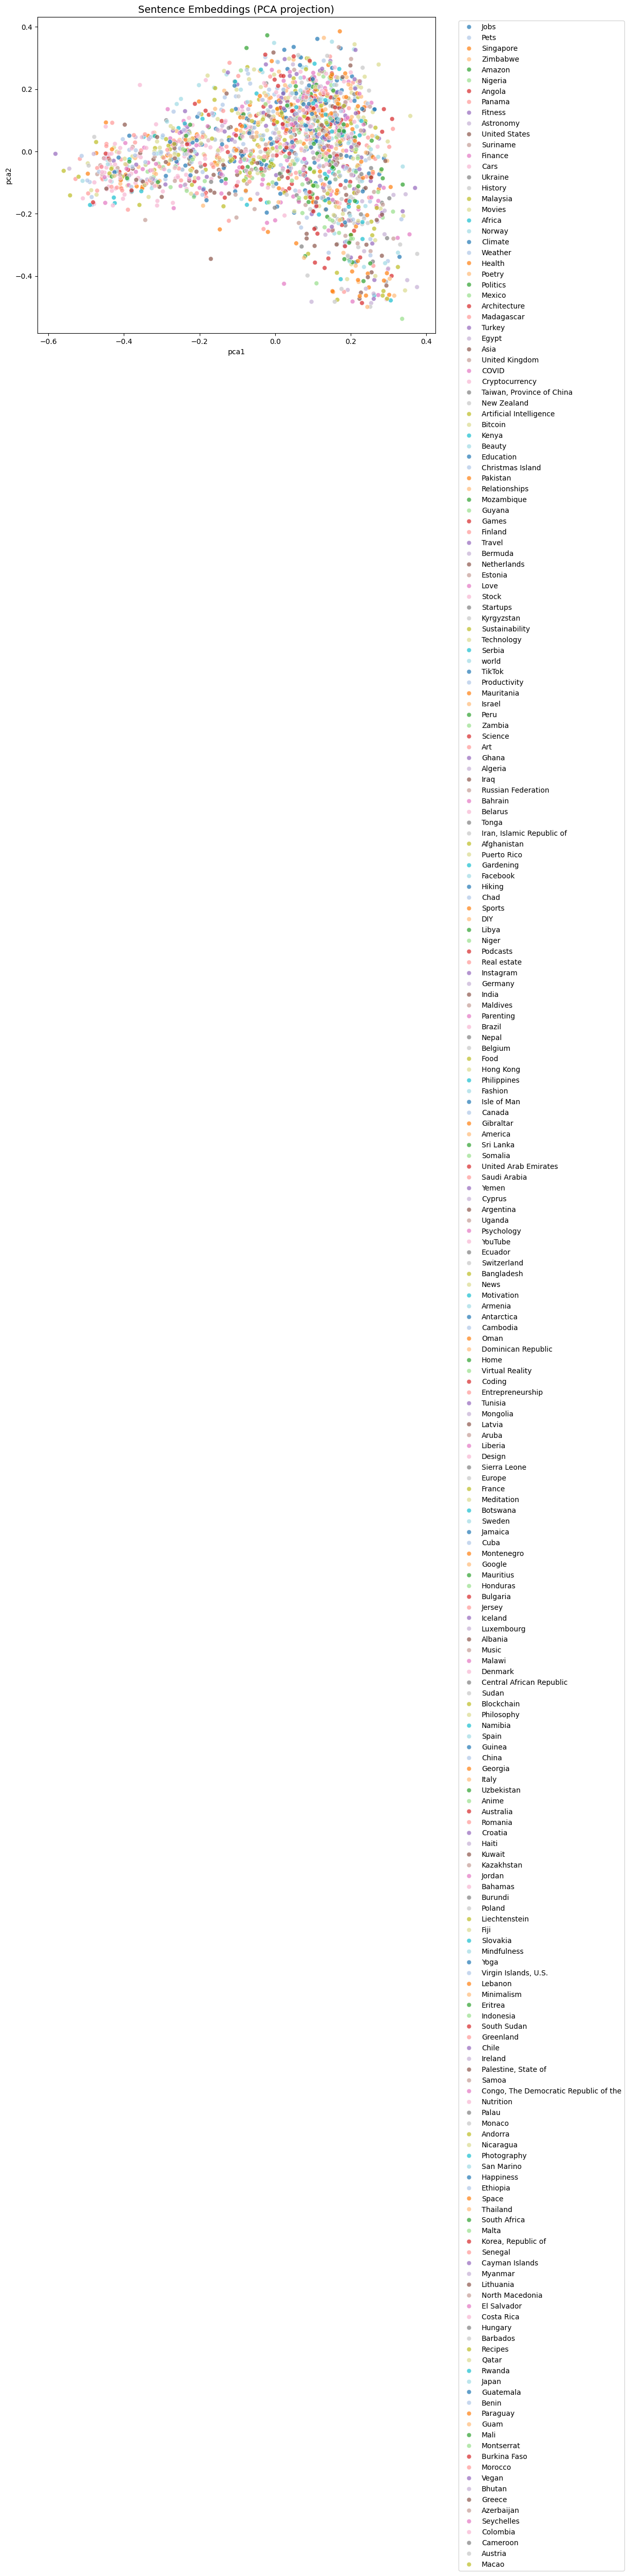

In [ ]:
import seaborn as sns
# Convert embeddings column (which is a list per row) into a numpy array
X = np.vstack(df['embedding'].values)

# Reduce to 2D using PCA
pca = PCA(n_components=2, random_state=42)
emb_2d = pca.fit_transform(X)

# Add PCA results back to dataframe
df['pca1'] = emb_2d[:, 0]
df['pca2'] = emb_2d[:, 1]

# Plot
plt.figure(figsize=(10,8))
sns.scatterplot(
    data=df.sample(2000, random_state=42),  # sample for clarity
    x='pca1', y='pca2',
    hue='category',        # color by category if available
    palette='tab20',
    alpha=0.7,
    s=40
)
plt.title("Sentence Embeddings (PCA projection)", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Check Example similarity
sim = cosine_similarity([df["embedding"].iloc[3]], [df["embedding"].iloc[5]])
print("Similarity:", sim[0][0])
sim = cosine_similarity([df["embedding"].iloc[12]], [df["embedding"].iloc[7]])
print("Similarity:", sim[0][0])

Similarity: 0.056730725
Similarity: 0.31367868


In [ ]:
df2 = df[['title_clean', 'content_clean', 'category','full_content','description','title_len', 'desc_len', 'content_len', 'statement_word_count', 'body_word_count', 'statement_char_count']]
df2.head()

,title_clean,content_clean,category,full_content,description,title_len,desc_len,content_len,statement_word_count,body_word_count,statement_char_count
0,chief urge world stop madness climate change,secretarygeneral antonio guterres urged world ...,Nepal,UN Secretary-General Antonio Guterres urged th...,UN Secretary-General Antonio Guterres urged th...,60,226,214,7,20,44
1,randeboo,randebooweb autumn winter nepal handmade ram v...,Nepal,None,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,37,152,204,1,16,8
2,chief urge world stop madness climate change,kathmandu nepal secretarygeneral antonio guter...,Nepal,None,UN Secretary-General Antonio Guterres urged th...,60,260,214,7,21,44
3,sikkim warning hydroelectricity push must acco...,least person lost life others including army p...,Nepal,At least 14 persons lost their lives and more ...,Ecologists caution against the adverse effects...,76,195,214,8,20,68
4,foreigner dual national cut hamas assault here,score foreign citizen killed taken hostage lis...,Nepal,None,"France lost 35 citizens, Thailand 33, US 31, U...",85,260,213,7,19,46


In [ ]:
#previously we did sentence embeddings for title now we'll be doing it for content
# Load SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode using content_clean
embeddings = model.encode(df2['content_clean'].tolist(), show_progress_bar=True)

# Convert to numpy for clustering
X = np.array(embeddings)

Batches:   0%|          | 0/3131 [00:00<?, ?it/s]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Try a range of cluster numbers
scores = {}
for k in [5, 10, 20, 30, 50]:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    scores[k] = score
    print(f"k={k}, silhouette={score:.4f}")

# Choose best k (highest silhouette score)
best_k = max(scores, key=scores.get)
print("Best number of clusters:", best_k)

# Final model
kmeans = KMeans(n_clusters=best_k, random_state=42)
df2['cluster'] = kmeans.fit_predict(X)

k=5, silhouette=0.0228
k=10, silhouette=0.0152
k=20, silhouette=0.0220
k=30, silhouette=0.0271
k=50, silhouette=0.0246
Best number of clusters: 30


/tmp/ipython-input-3203981826.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cluster'] = kmeans.fit_predict(X)


very low score for k that means clusters will overlap. (tried dbscan too not working so have removed that part.) so lets try a topic modelling approach.

In [ ]:
pip install bertopic umap-learn hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 7.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from bertopic import BERTopic

# Use combined title + content for better topics
df2['text'] = df2['title_clean'] + " " + df2['content_clean']

# Drop empty values
df2 = df2[df2['text'].str.strip().astype(bool)]

df2["text"] = (
    df2["title_clean"].fillna("") + " " +
    df2["description"].fillna("") + " " +
    df2["content_clean"].fillna("")
)
# Drop empty values
df2 = df2[df2['text'].str.strip().astype(bool)]

In [ ]:
topic_model = BERTopic(language="english",
                       calculate_probabilities=True,
                       verbose=True)

topics, probs = topic_model.fit_transform(df2['text'].tolist())

df2['topic'] = topics


2025-10-03 19:23:13,081 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/3131 [00:00<?, ?it/s]

2025-10-03 19:25:34,621 - BERTopic - Embedding - Completed ✓
2025-10-03 19:25:34,622 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-10-03 19:27:32,313 - BERTopic - Dimensionality - Completed ✓
2025-10-03 19:27:32,316 - BERTopic - Cluster - Start clustering the reduced embeddings
